In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Test datasets
solTestX = pd.read_csv("solubility/solTestX.txt",delimiter="\t") #Test set
solTestXtrans = pd.read_csv("solubility/solTestXtrans.txt",delimiter="\t")#Test set predictors after the same transformations used on the training set are applied.
solTestY = pd.read_csv("solubility/solTestY.txt",delimiter="\t") #Test set - solubility values for each compound

# Train datasets
solTrainX = pd.read_csv("solubility/solTrainX.txt",delimiter="\t") #Train set
solTrainXtrans = pd.read_csv("solubility/solTrainXtrans.txt",delimiter="\t") #Training set predictors after transformations for skewness and centering/scaling.
solTrainY = pd.read_csv("solubility/solTrainY.txt",delimiter="\t") #Train set - solubility values for each compound

In [41]:
solTrainXtrans.head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
661,0,1,0,0,1,0,0,1,0,0,...,4.177811,0.584815,0.000000,0.000,0.000,0.000,1.386294,-1.606542,6.812456,6.812456
662,0,1,0,1,1,1,1,1,0,0,...,5.092358,0.642355,0.693147,0.375,0.000,0.000,1.609438,-0.441330,9.753834,12.029604
663,1,1,1,1,1,0,0,1,0,1,...,4.023944,0.000000,1.098612,0.000,0.000,0.000,0.693147,-0.384859,8.245324,8.245324
665,0,0,1,0,0,0,1,0,0,0,...,3.510455,0.000000,0.000000,0.000,0.000,0.000,0.693147,-2.373472,0.000000,0.000000
668,0,0,1,1,1,1,0,0,1,0,...,3.317541,0.694335,0.000000,0.000,0.375,0.375,0.693147,-0.070987,9.913535,9.913535


In [56]:
solTrainXcont = solTrainXtrans.iloc[:,208:]

In [59]:
solTrainXcont.corr()

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
MolWeight,1.000000,0.696102,0.898239,0.710743,0.888004,0.535433,0.332835,0.320727,0.407092,0.361769,0.760025,0.192317,0.356649,0.229212,0.275348,0.340334,0.659112,0.121782,0.315321,0.338168
NumAtoms,0.696102,1.000000,0.875327,0.996692,0.854745,0.332841,0.605637,0.343415,0.199475,0.883859,0.914518,0.182535,0.478187,0.149731,-0.157959,-0.211683,0.548523,0.019405,0.430752,0.435522
NumNonHAtoms,0.898239,0.875327,1.000000,0.896275,0.994323,0.632856,0.417237,0.394330,0.475427,0.566011,0.923830,0.277647,0.468230,0.194016,0.074572,0.036178,0.765595,0.104582,0.463010,0.467065
NumBonds,0.710743,0.996692,0.896275,1.000000,0.881864,0.385818,0.560567,0.332716,0.251743,0.857341,0.934695,0.195886,0.461505,0.149572,-0.148551,-0.204749,0.605790,0.007656,0.424562,0.428716
NumNonHBonds,0.888004,0.854745,0.994323,0.881864,1.000000,0.662985,0.338911,0.369726,0.506438,0.541795,0.930362,0.280977,0.436981,0.181856,0.066277,0.032524,0.827501,0.084369,0.440706,0.443178
NumMultBonds,0.535433,0.332841,0.632856,0.385818,0.662985,1.000000,-0.007817,0.107196,0.938303,-0.012381,0.596507,0.334034,0.063899,0.163830,0.097153,0.075507,0.740413,-0.055952,0.178744,0.179287
NumRotBonds,0.332835,0.605637,0.417237,0.560567,0.338911,-0.007817,1.000000,0.341587,-0.066891,0.624748,0.386993,0.097053,0.486107,0.191012,-0.132320,-0.182709,-0.154291,0.135176,0.398938,0.423291
NumDblBonds,0.320727,0.343415,0.394330,0.332716,0.369726,0.107196,0.341587,1.000000,-0.144968,0.259334,0.253297,0.276744,0.680636,0.244100,-0.147645,-0.170965,0.161029,0.305795,0.623330,0.622554
NumAromaticBonds,0.407092,0.199475,0.475427,0.251743,0.506438,0.938303,-0.066891,-0.144968,1.000000,-0.104642,0.463665,0.287055,-0.080641,0.115186,0.135716,0.117918,0.632370,-0.089270,0.042646,0.041597
NumHydrogen,0.361769,0.883859,0.566011,0.857341,0.541795,-0.012381,0.624748,0.259334,-0.104642,1.000000,0.701587,0.080033,0.420541,0.085666,-0.370190,-0.406391,0.252426,-0.026980,0.349681,0.355863


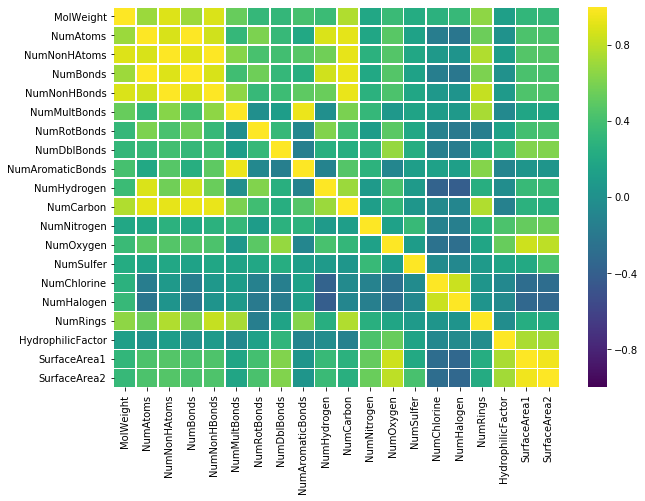

In [60]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(solTrainXcont.corr(), linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap="viridis")